In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

In [2]:
blob_centers = np.array([
       [2, 3],
       [1, 3],
       [3, 2],
       [2, 1],
       [1, 1]])
blob_std = np.array([0.3, 0.3, 0.2, 0.1, 0.4])

In [3]:
X, y = make_blobs(n_samples = 4000, centers = blob_centers,
                 cluster_std = blob_std, random_state = 33)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

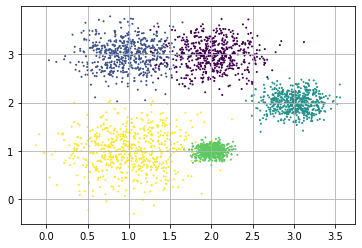

In [4]:
# with label

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 1)
plt.grid(True)

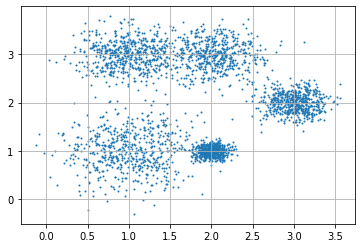

In [5]:
# without label

plt.scatter(X_train[:, 0], X_train[:, 1], s = 1)
plt.grid(True)

In [6]:
from sklearn.cluster import KMeans

In [7]:
range_cluster = range(3, 10)
cost = []

In [8]:
for k in range_cluster:
    kmeans = KMeans(n_clusters = k, random_state = 23)
    kmeans.fit(X_train)
    cost.append(kmeans.inertia_)

Text(0, 0.5, 'Cost')

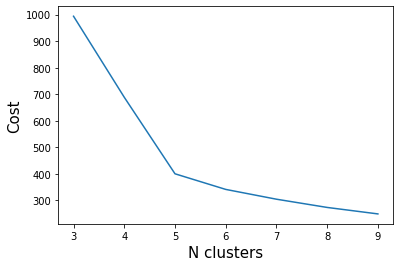

In [9]:
plt.plot(range_cluster, cost)
plt.xlabel('N clusters', fontsize = 15, rotation = 0)
plt.ylabel('Cost', fontsize = 15, rotation = 90)

In [10]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.labels_

array([3, 2, 0, ..., 0, 4, 2])

In [12]:
c1 = {}
c2 = {}

l1 = []
l2 = []

for i, j in enumerate(zip(y_train, kmeans.labels_)):
    j, k = j
    
    if j not in c1.keys():
        c1[j] = i
    if k not in c2.keys():
        c2[k] = i
    
    l1.append(c1[j])
    l2.append(c2[k])

In [13]:
l1 = np.array(l1)
l2 = np.array(l2)

sum(l1 == l2)/len(l1)

0.9496428571428571

In [14]:
kmeans.cluster_centers_

array([[0.9061695 , 0.98120998],
       [2.0365774 , 2.99460858],
       [0.98130882, 2.9934572 ],
       [3.00111847, 2.00522539],
       [1.94991781, 1.0018929 ]])

In [15]:
blob_centers

array([[2, 3],
       [1, 3],
       [3, 2],
       [2, 1],
       [1, 1]])

In [16]:
pred = kmeans.predict(X_test)

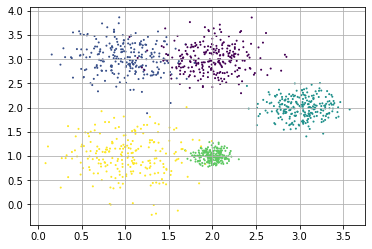

In [17]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 1)
plt.grid(True)

[-0.12637338287707744,
 3.5583017349827637,
 -0.3103692320579978,
 3.7897171018831397]

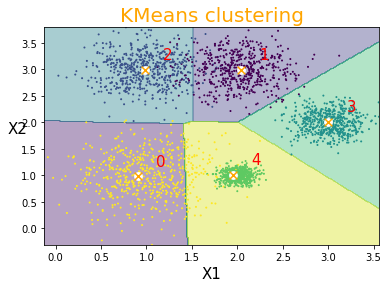

In [18]:
x0, x1 = np.meshgrid(
    np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 300),
    np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 300),
)

X_new = np.c_[x0.ravel(), x1.ravel()]

pred = kmeans.predict(X_new).reshape(x0.shape)

plt.contourf(x0, x1, pred, alpha = 0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = 'o', color = 'white', s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = 'x', color = 'orange', s = 60)

for i, j in enumerate(kmeans.cluster_centers_):
    plt.text(j[0]+0.2, j[1]+0.2, i, color = 'red', fontsize = 15)

plt.title('KMeans clustering', fontsize = 20, color = 'orange')

plt.xlabel('X1', fontsize = 15, rotation = 0)
plt.ylabel('X2', fontsize = 15, rotation = 0)

plt.axis([X_new[:, 0].min(), X_new[:, 0].max(), X_new[:, 1].min(), X_new[:, 1].max()])

In [19]:
kmeans.score(X)

-566.5397559945563

In [20]:
kmeans.predict(kmeans.cluster_centers_)

array([0, 1, 2, 3, 4])

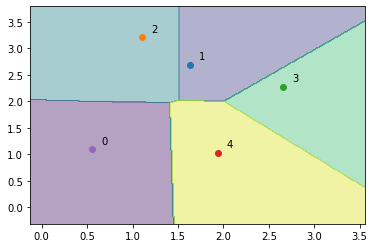

In [21]:
plt.contourf(x0, x1, pred, alpha = 0.4)

for i in range(5):
    m = X_test[y_test == i][0]
    plt.scatter(m[0], m[1])
    plt.text(m[0]+0.1, m[1]+0.1, kmeans.predict([m])[0])

In [22]:
kmeans.transform(X_test[: 5])

array([[2.17401128, 0.95284962, 1.82425203, 0.43523625, 1.45235201],
       [1.03471281, 1.96384733, 2.18198319, 1.43936926, 0.03293093],
       [2.47592848, 1.7330796 , 2.58592186, 0.35152227, 1.5111012 ],
       [1.85866213, 0.50553573, 0.71605365, 1.53279611, 1.7205622 ],
       [2.23245216, 0.95447926, 0.24509124, 2.2432455 , 2.35914513]])

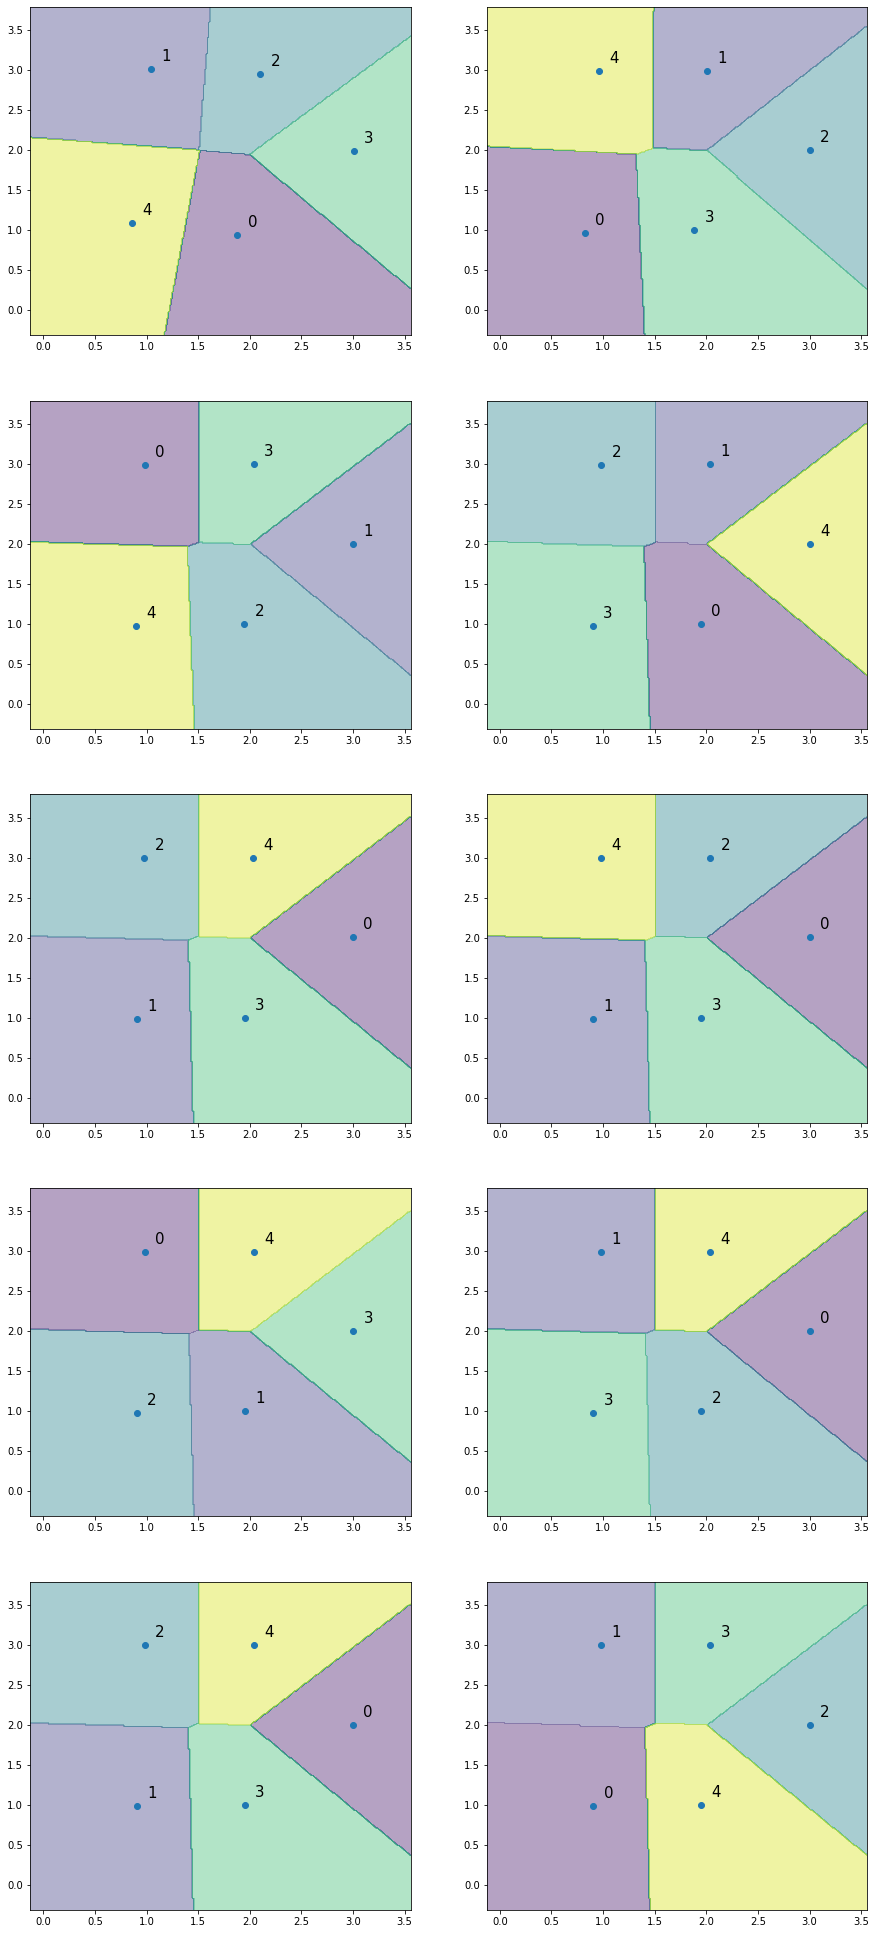

In [23]:
x0, x1 = np.meshgrid(
    np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 300),
    np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 300)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

fig = plt.figure(figsize = (15, 35))

for i in range(1, 11):
    kmeans = KMeans(n_clusters = 5, max_iter = i, n_init = i)
    kmeans.fit(X_train)
    
    axs = fig.add_subplot(5, 2, i)
    
    pred = kmeans.predict(X_new).reshape(x0.shape)
    axs.contourf(x0, x1, pred, alpha = 0.4)
    
    axs.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
    
    for j, center in enumerate(kmeans.cluster_centers_):
        axs.text(center[0]+0.1, center[1]+0.1, j, fontsize = 15)

In [24]:
kmeans.score(X)

-566.5397559945563

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
silhouette_score(X_train, kmeans.labels_)

0.5863412239255584

In [27]:
from sklearn.cluster import MiniBatchKMeans

In [28]:
minibatch_kmeans = MiniBatchKMeans(n_clusters = 5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [29]:
minibatch_kmeans.inertia_

570.3633135575135

In [30]:
import time

In [31]:
blob_centers = np.array([
    [3, -1],
    [1, 3],
    [9, 5],
    [-2, 4],
    [5, 2],
    [4, 7],
    [1, 6],
    [0, 7],
    [-1, 0],
    [-1, -2]
])

blob_std = np.array([0.3, 0.25, 0.33, 0.4, 0.3, 0.4, 0.3, 0.3, 0.25, 0.4])

In [32]:
X, y = make_blobs(n_samples = 10000, centers = blob_centers, cluster_std = blob_std)

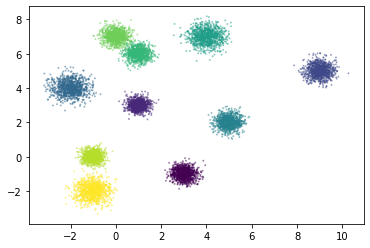

In [33]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 1, alpha = 0.4)

In [34]:
max_iter = np.arange(1, 11)
range_cluster = np.arange(1, 21)

inertia1 = []
inertia2 = []

time1 = []
time2 = []

count = 0
for i in max_iter:
    
    inertia1.append([])
    time1.append([])
    
    inertia2.append([])
    time2.append([])
    
    for k in range_cluster:    
        kmeans = KMeans(n_clusters = k, max_iter = i)
        t1 = time.time()
        kmeans.fit(X)
        t2 = time.time()
        inertia1[count].append(kmeans.inertia_)
        time1[count].append(t2-t1)

        
        minibatch_kmeans = MiniBatchKMeans(n_clusters = k, max_iter = i)
        t1 = time.time()
        minibatch_kmeans.fit(X)
        t2 = time.time()
        inertia2[count].append(minibatch_kmeans.inertia_)
        time2[count].append(t2-t1)

    count += 1

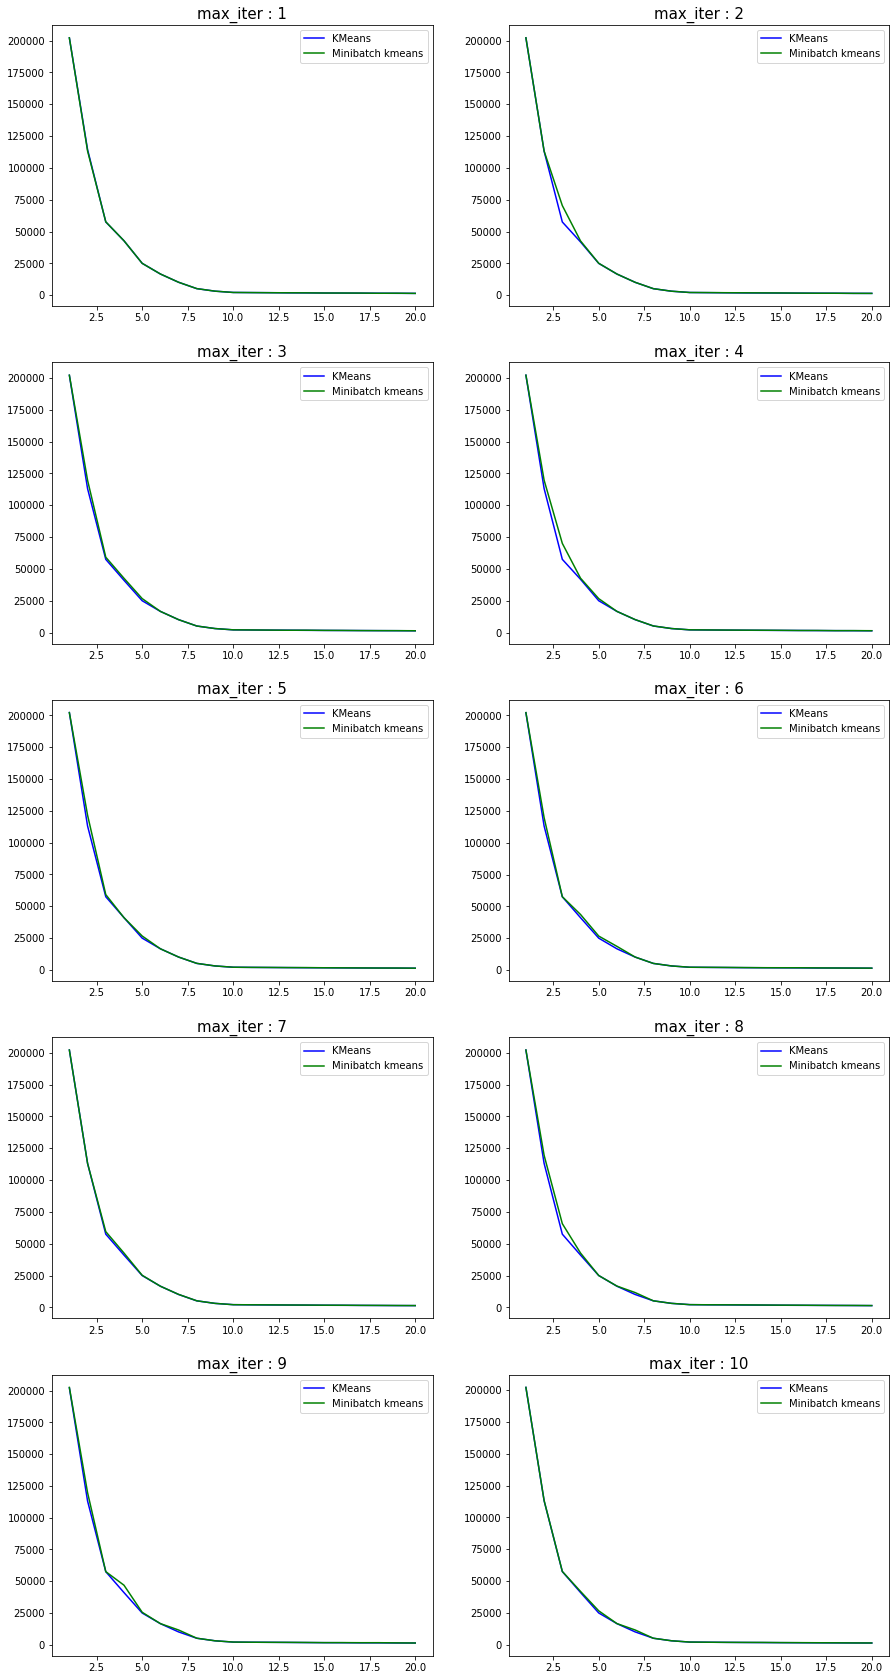

In [35]:
fig = plt.figure(figsize = (15, 30))

count = 0
for i in max_iter:
    axs = fig.add_subplot(5, 2, count+1)
    axs.set_title('max_iter : '+str(i), fontsize = 15)
    axs.plot(range_cluster, inertia1[count], 'blue', label = 'KMeans')
    axs.plot(range_cluster, inertia2[count], 'green', label = 'Minibatch kmeans')
    axs.legend()
    count += 1

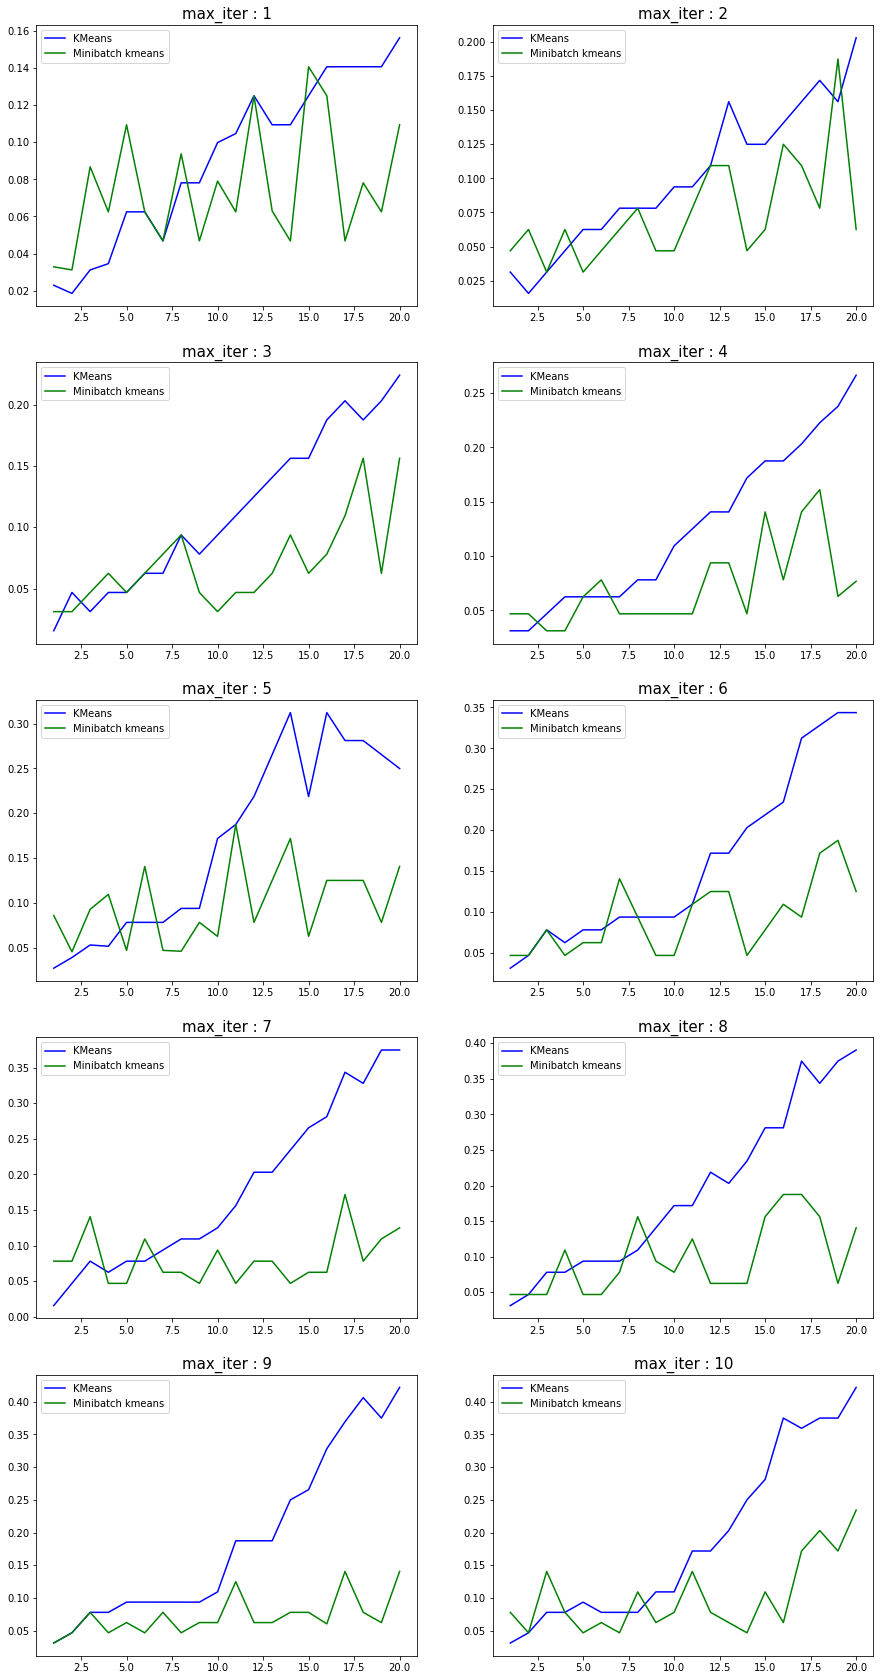

In [36]:
fig = plt.figure(figsize = (15, 30))

count = 0
for i in max_iter:
    axs = fig.add_subplot(5, 2, count+1)
    axs.set_title('max_iter : '+str(i), fontsize = 15)
    axs.plot(range_cluster, time1[count], 'blue', label = 'KMeans')
    axs.plot(range_cluster, time2[count], 'green', label = 'Minibatch kmeans')
    axs.legend()
    count += 1

In [37]:
silhouette_score(X, kmeans.labels_)

0.4350709047624949

In [61]:
blob_centers = np.array([[1, 2], [-1, 1], [1, 0]])
blob_std = np.array([0.3, 0.4, 0.4])

X, y = make_blobs(n_samples = 200, centers = blob_centers, cluster_std = blob_std)

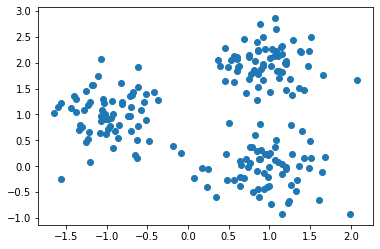

In [62]:
plt.scatter(X[:, 0], X[:, 1])

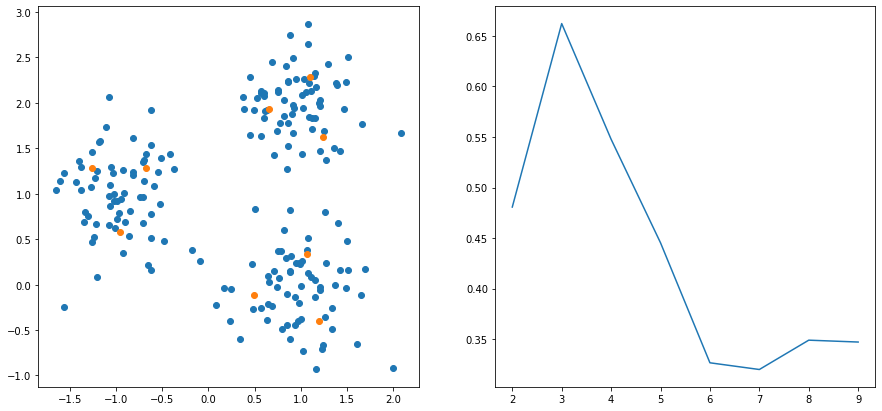

In [63]:
range_clusters = list(range(2, 10))

n_clusters = []
silhouette_coef = []

for i in range_clusters:
    clear_output(wait = True)
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    n_clusters.append(i)
    silhouette_coef.append(silhouette_score(X, kmeans.labels_))
    fig = plt.figure(figsize = (15, 7))
    axs1 = fig.add_subplot(1, 2, 1)
    axs2 = fig.add_subplot(1, 2, 2)
    axs1.scatter(X[:, 0], X[:, 1])
    axs1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
    axs2.plot(n_clusters, silhouette_coef)
#     plt.yticks([-1, 0, 1])
    plt.show()
    plt.pause(1)

In [41]:
from sklearn.metrics import silhouette_samples

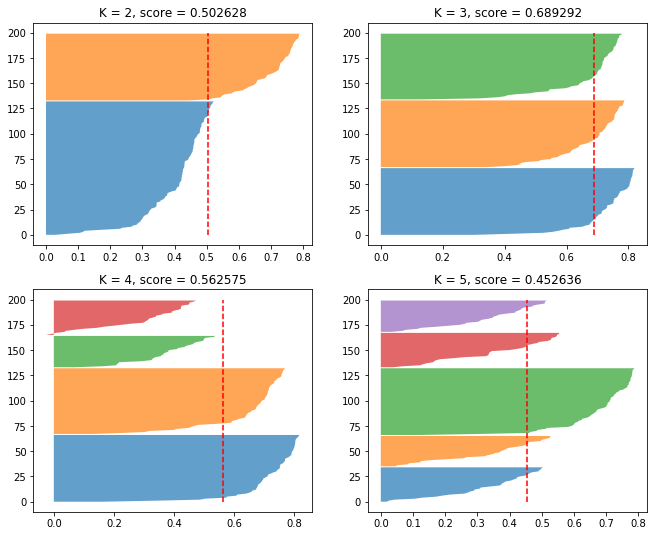

In [45]:
plt.figure(figsize = (11, 9))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k-1)
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    silhouette_coef = silhouette_samples(X, kmeans.labels_)
    pos = 0
    ticks = []
    for i in range(k):
        coeffs = silhouette_coef[kmeans.labels_ == i]
        coeffs.sort()
        
        plt.fill_betweenx(np.arange(pos, pos+len(coeffs)), coeffs, alpha = 0.7)
        pos += len(coeffs)
    plt.plot([silhouette_coef.mean(), silhouette_coef.mean()], [0, len(X)], 'r--')
    plt.title('K = %d, score = %f'% (k,silhouette_coef.mean()))

In [46]:
from matplotlib.image import imread

In [47]:
img = imread('img.jpg')
img.shape

(176, 286, 3)

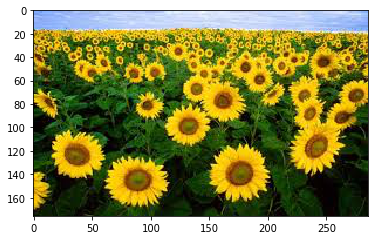

In [48]:
plt.imshow(img)

In [49]:
X = img.reshape(-1, 3)

In [50]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

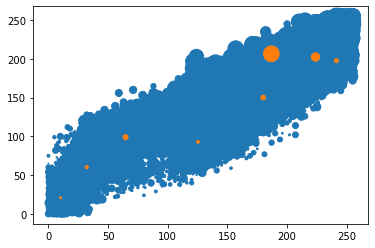

In [51]:
plt.scatter(X[:, 0], X[:, 1], s = X[:, 2])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = kmeans.cluster_centers_[:, 2])

In [52]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(img.shape).astype('int32')

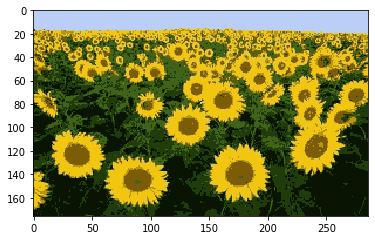

In [53]:
plt.imshow(segmented_img)

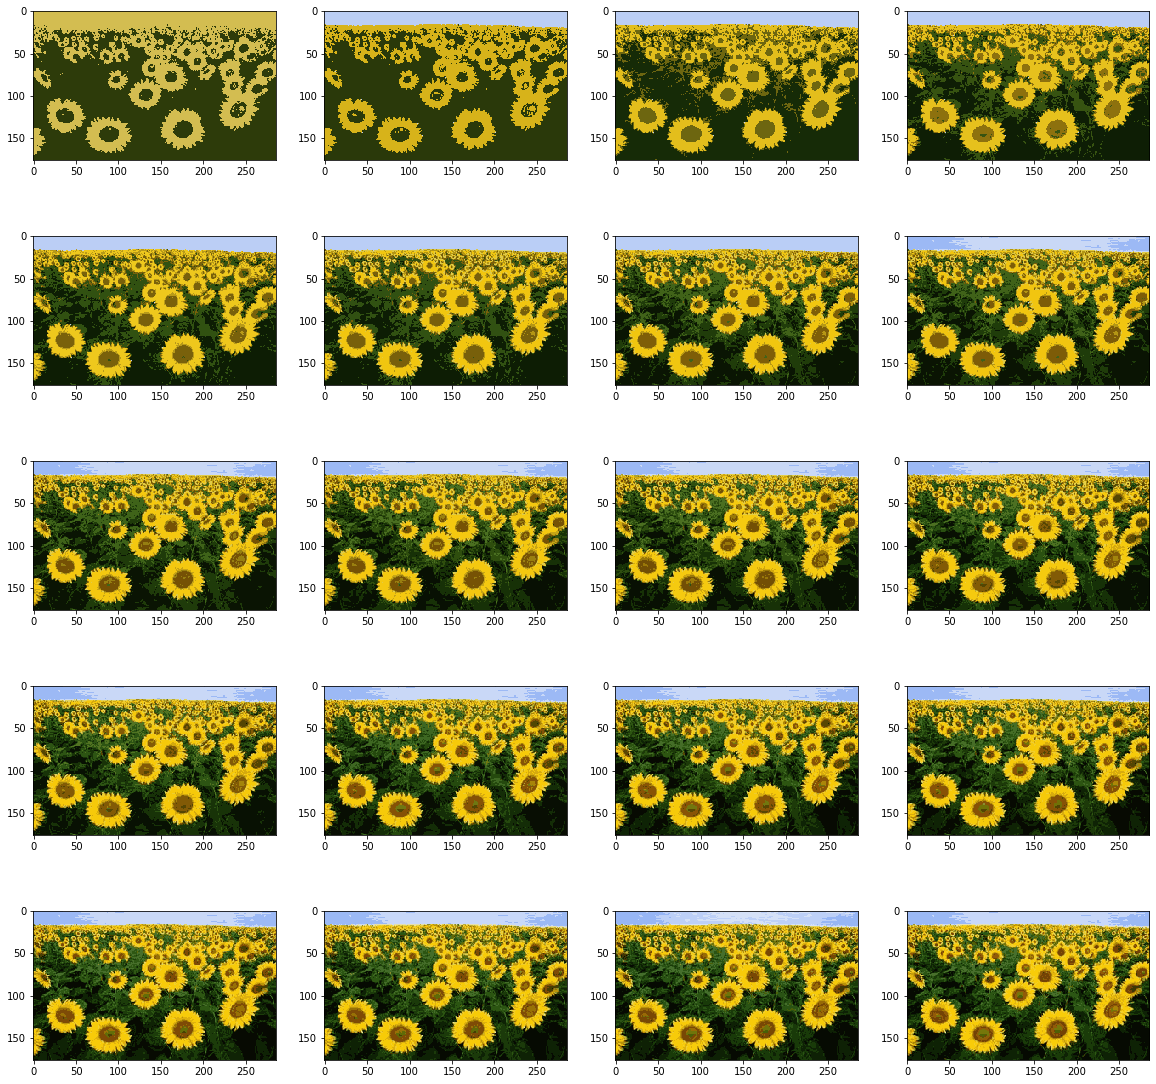

In [54]:
plt.figure(figsize = (20, 20))

X = img.reshape(-1, 3)

for k in range(2, 22):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    segmentation_img = kmeans.cluster_centers_[kmeans.labels_]
    segmentation_img = segmentation_img.reshape(img.shape).astype('int32')
    
    plt.subplot(5, 4, k-1)
    plt.imshow(segmentation_img)

In [55]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

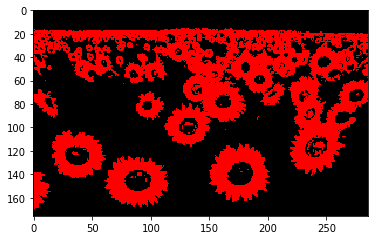

In [56]:
custom_colors = np.array([
    [255, 0, 0], [0, 0, 0], [0, 0, 0]
])
segmentation_img = custom_colors[kmeans.labels_].reshape(img.shape).astype('int32')
plt.imshow(segmentation_img)

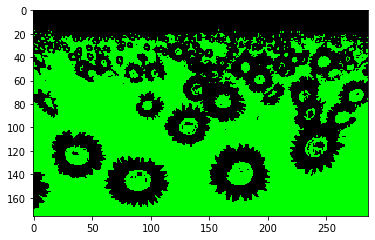

In [57]:
custom_colors = np.array([
    [0, 0, 0], [0, 255, 0], [0, 0, 0]
])
segmentation_img = custom_colors[kmeans.labels_].reshape(img.shape).astype('int32')
plt.imshow(segmentation_img)

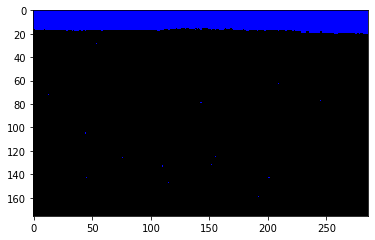

In [58]:
custom_colors = np.array([
    [0, 0, 0], [0, 0, 0], [0, 0, 255]
])
segmentation_img = custom_colors[kmeans.labels_].reshape(img.shape).astype('int32')
plt.imshow(segmentation_img)

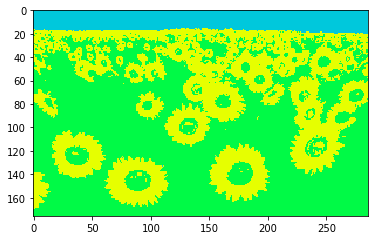

In [59]:
custom_colors = np.array([
    [230, 255, 0], [0, 250, 70], [0, 200, 220]
])
segmentation_img = custom_colors[kmeans.labels_].reshape(img.shape).astype('int32')
plt.imshow(segmentation_img)